# Particle Swarm Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function to create the swarm

In [2]:
def create_swarm(ub, lb, nVar, noP):
  # ub -> vector of upper bounds for each variable
  # lb -> vector of lower bounds for each variable
  # nVar -> number of variables
  # noP -> number of particles
  return {
    'particles': [
      {
        'X' : (ub - lb) * np.random.rand(nVar) + lb,
        'V' : np.zeros(nVar),
        'pbest' : {
          'X' : np.zeros(nVar),
          'O' : np.inf
        }
      } for i in range(noP)],
    'gbest' : {
      'X' : np.zeros(nVar),
      'O' : np.inf
    }
  }

## Function to run the iterations

In [3]:
def run_iterations(swarm, maxIter, noP, lb, ub, nVar, vMax, vMin, c1, c2, wMax, wMin, objective):

  gbests = []
  

  for t in range(maxIter):
    
    # for current positions, updating objective, pbest and gbest values
    for k in range(noP):
      currentX = swarm['particles'][k]['X']
      currO = objective(currentX)
  
      if currO < swarm['particles'][k]['pbest']['O']:
        swarm['particles'][k]['pbest']['X'] = currentX.copy()
        swarm['particles'][k]['pbest']['O'] = currO.copy()

      if currO < swarm['gbest']['O']:
        swarm['gbest']['X'] = currentX.copy()
        swarm['gbest']['O'] = currO.copy()

    # updating the weight
    w = wMax - (t+1) * ((wMax - wMin)/maxIter)

    # updating position and velocity vectors for each particle
    for k in range(noP):
      swarm['particles'][k]['V'] = w * swarm['particles'][k]['V'] \
                  + c1 * np.random.rand(nVar) * (swarm['particles'][k]['pbest']['X'] - swarm['particles'][k]['X']) \
                  + c2 * np.random.rand(nVar) * (swarm['gbest']['X'] - swarm['particles'][k]['X'])

      # limiting the velocity
      swarm['particles'][k]['V'] = np.minimum(swarm['particles'][k]['V'], vMax)
      swarm['particles'][k]['V'] = np.maximum(swarm['particles'][k]['V'], vMin)

      swarm['particles'][k]['X'] = swarm['particles'][k]['X'] + swarm['particles'][k]['V']

      # limiting the position
      swarm['particles'][k]['X'] = np.minimum(swarm['particles'][k]['X'], ub)
      swarm['particles'][k]['X'] = np.maximum(swarm['particles'][k]['X'], lb)

    gbests.append(swarm['gbest']['O'])

  print('Optimum value : ', swarm['gbest']['O'])
  print('Optimum position : ', swarm['gbest']['X'])
  return gbests

## Function to plot the graph of GBEST vs iterations

In [4]:
def make_plot(gbests):
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.set_yscale('log')
  ax.set_ylabel('Value of GBEST')
  ax.set_xlabel('Iteration #')
  ax.plot(gbests)

## Top level function

In [5]:
def particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin):
  swarm = create_swarm(ub, lb, nVar, noP)
  gbests = run_iterations(swarm, maxIter, noP, lb, ub, nVar, vMax, vMin, c1, c2, wMax, wMin, objective)
  make_plot(gbests)

## Graphing for different values of parameters

### Case 1 : c1 = c2 = 2

Optimum value :  6.2322425400729014e-21
Optimum position :  [-1.26481849e-11  9.49861454e-12 -4.00858181e-11  1.03751859e-11
 -2.35435359e-11  2.23551739e-12 -2.61655089e-11  3.73550911e-11
  2.04966900e-11  3.47574218e-11]


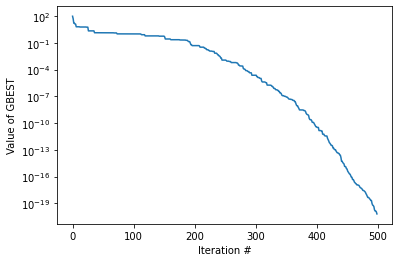

In [6]:
# defining the parameters of the problem
nVar = 10
ub = np.array([10 for i in range(nVar)])
lb = np.array([-10 for i in range(nVar)])
vMax = (ub - lb) * 0.2
vMin = -vMax

def objective(x):
  return np.sum(np.square(x)) 

# defining the parameters of Particle Swarm Optimization
noP = 30
maxIter = 500
wMax = 0.9
wMin = 0.2
c1 = 2
c2 = 2

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)

### Case 2 : c1 = 0, c2 = 2

Optimum value :  3.0143575327322706e-20
Optimum position :  [-1.53056036e-10 -2.93492657e-13  2.58843995e-11  1.52163496e-15
 -3.80155919e-11  3.14521672e-12  2.38304248e-12 -6.02140536e-11
  3.28900632e-16 -3.09975500e-11]


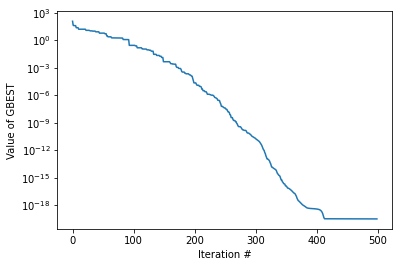

In [7]:
c1 = 0

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
c1 = 2 # reversing changes 

### Case 3 : c1 = 2, c2 = 0

Optimum value :  173.6304557730422
Optimum position :  [ 2.16371906 -2.13577344 -5.77794557 -9.17900135 -4.22163299 -2.8879914
  2.02995917  3.73819188 -0.60647051 -1.45713007]


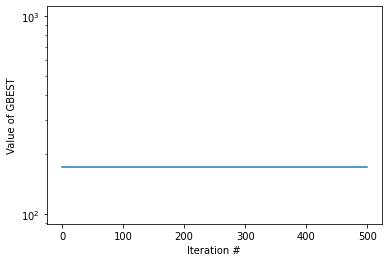

In [9]:
c2 = 0

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
c2 = 2 # reversing changes 

### Case 4 : c1 = c2 = 2, wMax = wMin = 0.9

Optimum value :  1.8660613194786797
Optimum position :  [ 0.58514198 -0.30192766 -0.03524889  0.04653245 -0.85614471  0.09424401
  0.28739582 -0.02522881  0.47955661 -0.61157913]


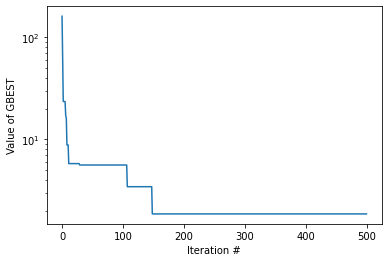

In [10]:
wMin = 0.9

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
wMin = 0.2 # reversing changes 

### Case 5 : c1 = c2 = 2, wMax = wMin = 0.2

Optimum value :  1.1124704721857271e-14
Optimum position :  [ 8.79807554e-10  9.98205926e-10  3.79008793e-16 -8.55336088e-08
 -7.11911862e-10  1.35777345e-08  5.95925669e-08  5.41560311e-10
  1.08800413e-15 -8.39684482e-09]


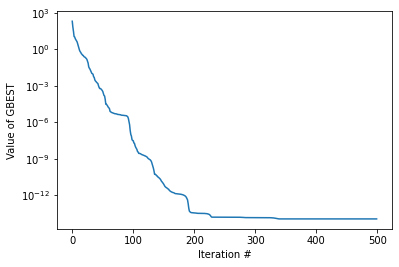

In [11]:
wMax = 0.2

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
wMax = 0.9 # reversing changes 

### Case 6 : Decreasing number of particles

Optimum value :  1.0612003889755533e-06
Optimum position :  [ 9.50638930e-06 -9.13205105e-05  7.80931605e-05 -8.55378055e-04
  1.70323087e-04 -1.94150278e-04  4.31185859e-04 -1.63914007e-04
 -1.88274571e-04  7.73170418e-06]


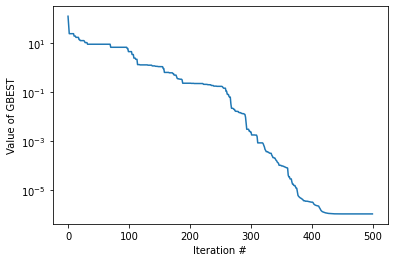

In [12]:
noP = 5


particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
noP = 30 # reversing changes 

### Case 6 : Increasing number of particles

Optimum value :  7.70641197047732e-32
Optimum position :  [-4.21994225e-17  1.35584692e-16  3.70392977e-17 -3.01342718e-18
  1.41906353e-16 -1.03410731e-16  7.48462034e-17 -1.22378914e-16
 -5.36020630e-17  3.51596763e-17]


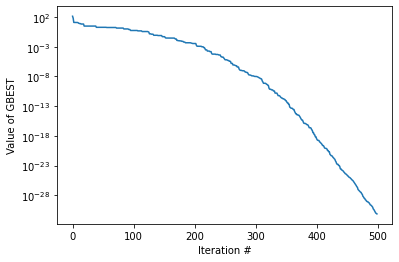

In [13]:
noP = 100

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
noP = 30 # reversing changes 